In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
# https://www.tensorflow.org/beta/tutorials/keras/basic_classification

mnist_data = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist_data.load_data()


In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

shape(28, 28)
0


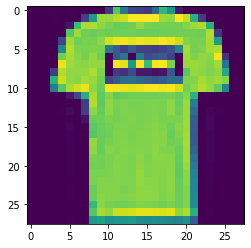

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# each image is 28*28
print("shape"+str(x_train[1].shape))

# class_name of item 1
print(y_train[1])

plt.imshow(x_train[1])

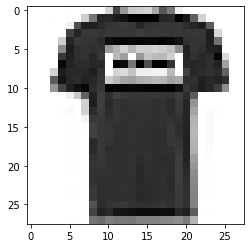

In [11]:
# binary version of the same image as above

plt.imshow(x_train[1], cmap=plt.cm.binary)

In [15]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [16]:
# normalizing images

x_train = x_train/255.0
x_test = x_test/255.0

In [17]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

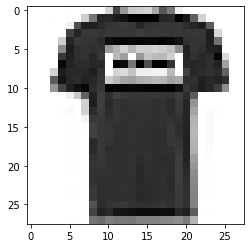

In [18]:
plt.imshow(x_train[1], cmap=plt.cm.binary)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(x_train,y_train,epochs=5)

W0625 23:27:54.125916 13260 deprecation.py:323] From c:\users\vagdevi\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.4966 - accuracy: 0.8260
Epoch 2/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3748 - accuracy: 0.8645
Epoch 3/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3365 - accuracy: 0.8784
Epoch 4/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3118 - accuracy: 0.8855
Epoch 5/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2920 - accuracy: 0.8924


In [23]:
# model.evaluate directly gives out the loss and accuracy associated with the trained model

test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc

10000/10000 [==============================] - 1s 57us/sample - loss: 0.3402 - accuracy: 0.8789


0.8789

In [24]:
# model.predict gives the probabilities associated with each output neuron for each test image

prediction = model.predict(x_test)
prediction[0]

array([3.1538727e-07, 1.2731009e-08, 3.9967645e-08, 1.9087527e-09,
       2.0008871e-08, 6.1753667e-03, 1.2770785e-06, 2.2254484e-02,
       5.4338142e-07, 9.7156793e-01], dtype=float32)

9
Ankle boot


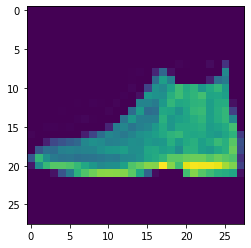

In [27]:
# np.argmax gives the index of the maximum element in the np array

print(np.argmax(prediction[0]))
print(class_names[9])
plt.imshow(x_test[0])

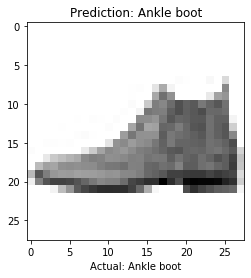

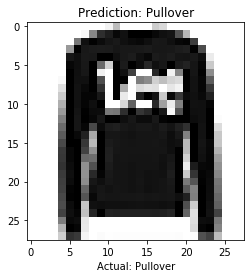

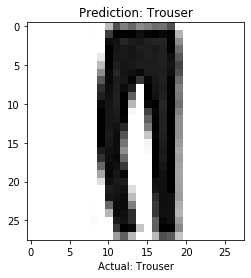

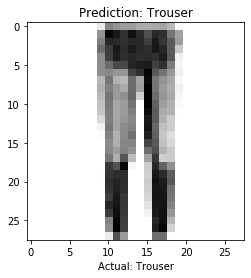

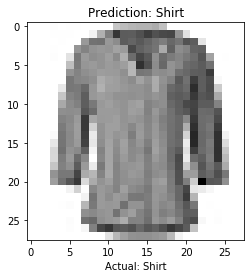

In [32]:
for i in range(5):
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: "+class_names[y_test[i]])
    plt.title("Prediction: "+class_names[np.argmax(prediction[i])])
    plt.show()